In [1]:
import  numpy as  np
import matplotlib.pyplot as plt


Data

In [2]:
y=np.array([2158.70,1678.15,2316.00,2061.30,2207.50,1708.30,1784.70,2575.00,2357.90,2256.70,2165.20,2399.55,1779.80,2336.75,1765.30,2053.50,2414.40,2200.5,2654.2,1753.7])
x=np.array([15.50,23.75,8.00,17.00,5.50,19.00,24.00,2.50,7.50,11.00,13.00,3.75,25.00,9.75,22.00,18.00,6.00,12.50,2.00,21.50])

$S_{xx}$

In [3]:
def Sxx(x):
  x_prom=np.average(x)

  S_xx=0
  for  i  in x:
    S_xx+=(i-x_prom)**2
  return S_xx

print("S_xx= {:.2f}".format(Sxx(x)))



S_xx= 1106.56


$S_{xy}$

In [4]:
def Sxy(x,y):
  xsum=sum(x)
  ysum=sum(y)

  x_times_y = np.vectorize(lambda a, b: a * b)
  xysum= sum(x_times_y(x, y))

  S_xy=xysum-(xsum*ysum/len(x))
  return S_xy

print("S_xy= {:.2f} ".format(Sxy(x,y)))


S_xy= -41112.65 


$B_1$ y  $B_0$

In [5]:
def regresionLineal(x,y):
  B1=Sxy(x,y)/Sxx(x)
  B0=np.average(y)-(B1*np.average(x))

  print("B1={:.2f},  B0={:.2f}".format(B1,B0))
  return B1,B0

B1,B0=regresionLineal(x,y)

x_r=np.linspace(0,25,20)
Y_r=B0+(B1*x_r)


B1=-37.15,  B0=2627.82


Grafica

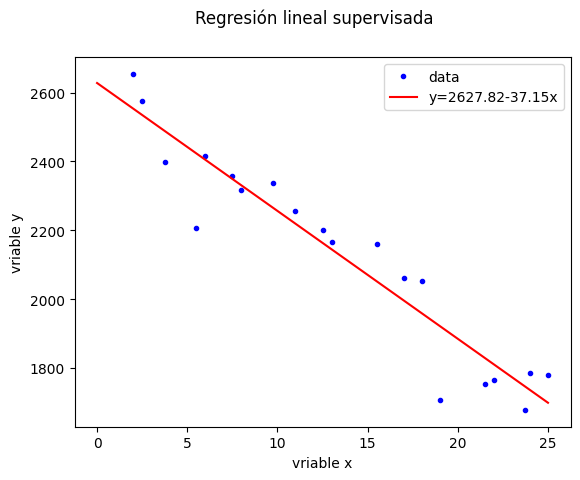

In [6]:
plt.figure()
ax=plt.subplot()
ax.plot(x,y,".b",label="data")
ax.plot(x_r,Y_r,"red",label="y={:.2f}{:.2f}x".format(B0,B1))
ax.set_xlabel("vriable x")
ax.set_ylabel("vriable y")
plt.legend()

plt.suptitle("Regresión lineal supervisada")
plt.show()

Error

In [15]:
def error_cuadratico(x,y,B0,B1):
  Y_r=B0+(B1*x)
  error=0
  Y_k=B0+(B1*x)
  for i  in range(len(x)):
    error+=(y[i]-Y_k[i])**2
  error=error/len(x)
  return error

def media(x,y,B0,B1):
  Y_r=B0+(B1*x)
  media=0
  Y_k=B0+(B1*x)
  for i  in range(len(x)):
    media+=(y[i]-Y_k[i])
  media=media/len(x)
  return media

def SSrest(x,y):

  x_times_y = np.vectorize(lambda a, b: a * b)
  ysum2=sum(x_times_y(y,y))
  yprom2=np.average(y)**2

  SSrest=ysum2-(len(x)*yprom2)-(B1*Sxy(x,y))
  return SSrest

SSrest= SSrest(x,y)
error=error_cuadratico(x,y,B0,B1)
media= media(x,y,B0,B1)
print("La suma de cuadrados de los residuos SCE = {:.2f} \n La media del error es {:.2f} \n STC = {:.2f}".format(error, media,SSrest))




La suma de cuadrados de los residuos SCE = 8312.74 
 La media del error es 0.00 
 STC = 166254.86
